In [18]:
from shapely.geometry import Point, Polygon, LineString
import geopandas as gpd
import pandas as pd 

In [2]:
line1 = [(1,1),(2,1.2),(3,1)]

In [3]:
line2 = [(1,2),(2,2.2),(3,2)]

In [10]:
polgonList = line1 + line2

In [11]:
polgonList

[(1, 1), (2, 1.2), (3, 1), (1, 2), (2, 2.2), (3, 2)]

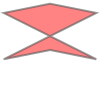

In [12]:
Polygon(polgonList)

In [13]:
line2reverse = list(reversed(line2))

In [14]:
polgonList2 = line1 + line2reverse

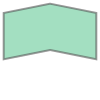

In [15]:
Polygon(polgonList2)

In [103]:
d = {'identifier' : [1, 2],
     'name' : ["Netherlands", "Germany"],
     "line1": [[(1,1),(2,1.2),(3,1)], [(1,1),(2,1.2),(3,1)]],
     "line2": [[(1.1,2.1),(2.1,2.3),(3.1,2.2)],[(1,2),(2,2.2),(3,2)]]
    }

In [104]:
df = pd.DataFrame(d)

In [105]:
df

,identifier,line1,line2,name
0,1,"[(1, 1), (2, 1.2), (3, 1)]","[(1.1, 2.1), (2.1, 2.3), (3.1, 2.2)]",Netherlands
1,2,"[(1, 1), (2, 1.2), (3, 1)]","[(1, 2), (2, 2.2), (3, 2)]",Germany


In [106]:
def makePolygon(row):
    line2reverse = list(reversed(row["line2"]))
    return Polygon(line1+line2reverse)
    

In [107]:
geometries = []
for index, row in df.iterrows():
    geometries.append(makePolygon(row))

In [108]:
print(geometries[0])

POLYGON ((1 1, 2 1.2, 3 1, 3.1 2.2, 2.1 2.3, 1.1 2.1, 1 1))


In [109]:
crs = {'init': 'epsg:4326'} 
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometries)

In [110]:
%matplotlib inline

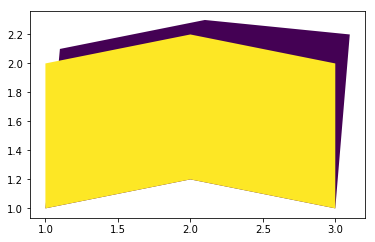

In [112]:
gdf.plot(column='identifier')